# Analyze A/B Test Results 

## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website. My goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

## Part I - Probability

To get started, let's import our libraries.

In [101]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [102]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [103]:
# INFO function show us the number of rows in our database, data type and also column names. 
# Additionallywe can see the is there any null rows in our columns.
## According to following table there is 294.478 rows and there are 5 columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


**c.** The number of unique users in the dataset.

In [104]:
# NUNIQUE function shows us the unique numbers in our column.
## According to following table there are 290.584 unique id number in user id column. 
## Even the 294.478 row there are 290.584 user id. It means that there are duplicate users’ records.

df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [105]:
# I need to solve this equation => ( converted_user / total_user ) * 100
## total_user was found above. To find converted_user, I used following fucntion.

total_user = df['user_id'].nunique()
converted_user = (df['converted'] == 1).sum()
proportion_of_user_converted = ( converted_user / total_user ) * 100
print(proportion_of_user_converted)

12.126269856564711


In [106]:
# If the question is not relevent to unique users solution can be follow
proportion_of_user_converted = df.converted.mean()*100
proportion_of_user_converted

11.96591935560551

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [107]:
no_match_treatment = df.query('group == "treatment" & landing_page != "new_page"').user_id.count()
no_match_control = df.query('group == "control" & landing_page != "old_page"').user_id.count()
no_match_treatment + no_match_control


3893

**f.** Do any of the rows have missing values?

In [108]:
# There are 294477 + 1 rows = 294478 and there is no null count of rows are equal to total rows. 
# So there is no no-null rows in our database.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  



In [109]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# Firsty I dropped the control&new page rows from dataframe

df_filtered_ControlNew = df[(df["group"] == "control") & (df["landing_page"] == "new_page")].index
df1 = df.drop(df_filtered_ControlNew)
df1.head()



,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [110]:
#Secondly I dropped treatment&old page rows from dataframe which I created above.

df_filtered_TreatmentOld = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")].index
df2 = df1.drop(df_filtered_TreatmentOld)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [111]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  


**a.** How many unique **user_id**s are in **df2**?

In [112]:
df2["user_id"].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [113]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [114]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [115]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 


df2= df2.drop(index=2893)

In [116]:
# Check again if the row with a duplicate user_id is deleted or not

df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [117]:
df2[["converted"]].mean()

converted    0.119597
dtype: float64

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [118]:
# I filtered control group and calculated converted's mean

df2_control = df2[df2["group"] == "control"]["converted"].mean()
df2_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [119]:
# I filtered treatment group and calculated converted's mean

df2_treatment = df2[df2["group"] == "treatment"]["converted"].mean()
df2_treatment

0.11880806551510564

In [120]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = df2_treatment - df2_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [121]:
total = df2["user_id"].count()
new_page_count = df2[df2["landing_page"] == "new_page"]["user_id"].count()
new_page_count / total

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**My Answer:** %11.96 percentof user converted. 12.04% comes from control group and 11.88% come from treatment group. So we can not say directly treatment group users lead to more conversions. This little difference comes from by anything.

The probability of receiving the new page is 50.00%. It shows that the users received the new or the old page in a ration very close to 50/50, which is a good thing.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, I could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do I stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do I run to render a decision that neither page is better than another?  

### ToDo 2.1
For now, consider I need to make the decision just based on all the data provided.  

My null hypothesis and alternative hypothesis are as follows:

**$H_0$**: **$p_{old}$** $\geq$ **$p_{new}$**

**$H_1$**: **$p_{old}$** < **$p_{new}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, I will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [122]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [123]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [124]:
n_new = df2[df2["group"] == "treatment"]["converted"]
len(n_new)

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [125]:
n_old = df2[df2["group"] == "control"]["converted"]
len(n_old)

145274

**My Comment:** There are 145,310 users are in the treatment group and 145,274 are in the control group.

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [126]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1,0], size = len(n_new), replace = True, p = (p_new, 1-p_new))
new_page_converted.mean()

0.11981969582272384

**My Comment:** new_page_converted is an array with values 1 or 0 and a length of 145,310. The conversion rate of this array is a number fluctuate around 12%.

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [127]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1,0], size = len(n_old), replace = True, p = (p_old, 1-p_old))
old_page_converted.mean()

0.11951209438715805

**My Comment:** old_page_converted is an array with values 1 or 0 and a length of 145.274. The conversion rate of this array is a number fluctuate around 12%.

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [128]:
new_page_converted.mean() - old_page_converted.mean()

0.00030760143556578246


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [129]:
# Sampling distribution 
## About Part II [h] the 10000 simulations ,when possible, it is always more computationally efficient to use NumPy built-in operations over explicit for loops. The short reason is that NumPy -based operations attack a computational problem based on vectors by computing large chunks simultaneously.
# Additionally, using loops to simulate 10000 can take a considerable amount of time vs using Numpy, 
"""
p_diffs = []

for i in range(1,10000):
    old_page_converted = np.random.choice([1,0], size = len(n_old), replace = True, p = (p_old, 1-p_old))
    new_page_converted = np.random.choice([1,0], size = len(n_new), replace = True, p = (p_new, 1-p_new))
    
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)
"""

'\np_diffs = []\n\nfor i in range(1,10000):\n    old_page_converted = np.random.choice([1,0], size = len(n_old), replace = True, p = (p_old, 1-p_old))\n    new_page_converted = np.random.choice([1,0], size = len(n_new), replace = True, p = (p_new, 1-p_new))\n    \n    p_diff = new_page_converted.mean() - old_page_converted.mean()\n    p_diffs.append(p_diff)\n'

In [130]:
# To decrease the effectiveness
 
new_converted_simulation = np.random.binomial(len(n_new.index), p_new, 10000)/len(n_new.index)
old_converted_simulation = np.random.binomial(len(n_old.index), p_old, 10000)/len(n_old.index)
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**

Plot a histogram of the **p_diffs**.  Does this plot look like what I expected? 



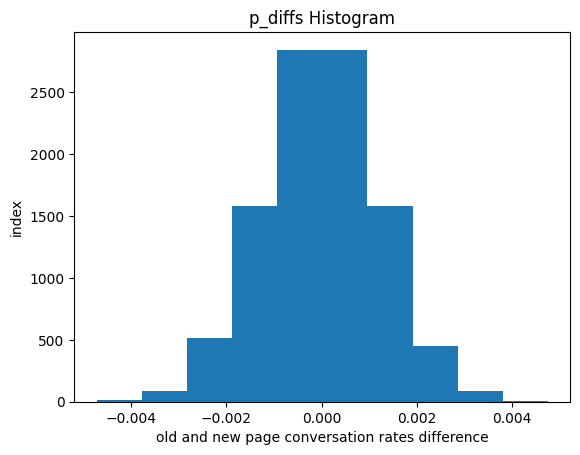

In [131]:
plt.title("p_diffs Histogram")
plt.ylabel("index")
plt.xlabel("old and new page conversation rates difference")
plt.hist(p_diffs);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [132]:
treat_converted = df2.query('group == "treatment"')['converted'].mean()
control_converted = df2.query('group == "control"')['converted'].mean()
actual_diff = treat_converted - control_converted
actual_diff

-0.0015782389853555567

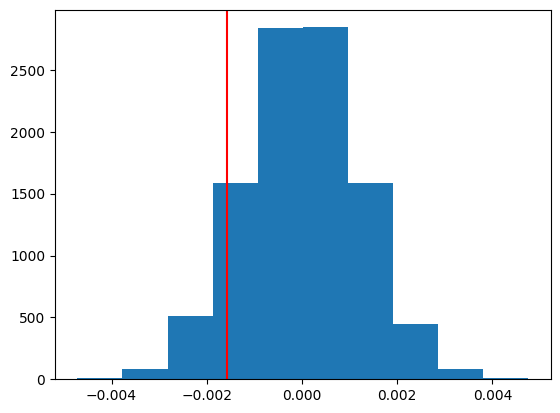

In [133]:
#plotting hist for actual_diffs
plt.hist(p_diffs);
plt.axvline(x=actual_diff, color='red');

**Comment:** The proportion of the p_diffs are greater than the actual difference.

 
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

In [134]:
#proportion of null vs actual values
(p_diffs > actual_diff).mean()

0.906

**My Comment:** %90 of the values in null_vals are larger than the actual difference.


**My Answer:** I calculate the proportion of values that are bigger than the observed difference. The p-value is about 0.9038. With a Type-I-Error-Rate of 0.05, 0.8965 is much bigger than 0.05, therefore there is no enough evidence to reject the null hypothesis.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [135]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" and converted == 1'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page == "new_page" and converted == 1'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "new_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "old_page"'))

In [136]:
convert_new, convert_old

(17264, 17489)

In [137]:
n_new, n_old

(145274, 145310)

**m.** Now I will use `sm.stats.proportions_ztest()` to compute your test statistic and p-value. 

In [138]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
print(z_score, p_value)

1.2616957421858055 0.8964708551967226


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

**My Answer:** The z-score and p-value computed above show that we fail to reject the null hypothesis. Since the p-value is 0.90, which is significantly higher than the 0.05 error rate, it means that cannot infer with a 95% CI, that the conversion rate of the new page is not greater than the conversion rate of the old page.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, I will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should I be performing in this case?

**My Answer:** Logistic regression should be used since the dependant variable is binary.



**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, I first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [139]:
df_reg = df2.copy()
df_reg.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [140]:
#add intercept
df_reg["intercept"] = 1


In [141]:
#get dummies and rename
df_reg = df_reg.join(pd.get_dummies(df_reg["group"]))
df_reg.rename(columns = {"treatment": "ab_page"}, inplace=True)

In [142]:
df_reg.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [143]:
y = df_reg["converted"]
x = df_reg[["intercept", "ab_page"]]
#load model
log_mod = sm.Logit(y,x)
#fit model
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [144]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-05-28 19:34 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [145]:
np.exp(-0.0150)

0.9851119396030626

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value I found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- I may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- I may also compare the current p-value with the Type I error rate (0.05).


**My Answer:** 

The p-value calculated on ab_page is about 0.19. Difference between the p-values in Part II and Part III can be cause by one-sided hypothesis and two-side hypothesis.

Ho for regression: Pnew = Pold 

H1 for regression: Pnew != Pold

**f.** Now, I am considering other things that might influence whether or not an individual converts. 

**My Answer:**

Considering the other factors is might be more effective and accurated. Because there might be orther factors can effect to our results. But interactions  between other factors can effect our results. It doesnt wanted from us. 


**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. I will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. 

2. Does it appear that country had an impact on conversion?  

In [146]:
# Read the countries.csv

countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [147]:
# Create the necessary dummy variables
countries[['CA', 'UK']] = pd.get_dummies(countries['country'])[['CA','UK']]
countries.head()

,user_id,country,CA,UK
0,834778,UK,0,1
1,928468,US,0,0
2,822059,UK,0,1
3,711597,UK,0,1
4,710616,UK,0,1


In [148]:
# Join with the df2 dataframe
df_new = countries.set_index('user_id').join(df_reg.set_index('user_id'), how='inner')
df_new.head()

,country,CA,UK,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,,,
834778,UK,0,1,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,0,1,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [149]:
df_new=df_new.drop('country', axis=1)
df_new.head()

,CA,UK,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,,
834778,0,1,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,0,1,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [150]:
df_new.query('CA == 1').converted.mean()

0.11531829781364232

In [151]:
df_new.query('UK == 1').converted.mean()

0.12059448568984076

In [152]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])

In [153]:
result_lm = lm.fit()
result_lm.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 May 2023   Pseudo R-squ.:               2.323e-05
Time:                        19:34:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**My Comment:** 

I found the new conversion rates are similar to previous conversation rates. So I can say that countries are not effecting the conversion rates. Also we can see the p value that higer than 0,05 for all variables (ab_page, CA and UK). 

**h. Fit your model and obtain the results**<br> 
Though I have now looked at the individual factors of country and page on conversion, I would now like to look at an interaction between page and country to see if are there significant effects on conversion.  

**Create the necessary additional columns, and fit the new model.** 

Provide the summary results (statistical output), and my conclusions (written response) based on the results. 

>**Questions?**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [154]:
# Fit your model, and summarize the results
df_new['intercept'] = 1
df_new['CA_ab'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab'] = df_new['UK'] * df_new['ab_page']


lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA_ab', 'UK_ab', 'CA', 'UK']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2023-05-28 19:34 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_ab        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_ab         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
==================================================================

"""

In [155]:
np.exp(results.params)

intercept    0.137178
ab_page      0.979646
CA_ab        0.954198
UK_ab        1.031896
CA           0.982625
UK           0.994272
dtype: float64


**My Comment:** 

According to p_values, all p values are all larger than 0.05. 
Countries have intreraction with pages. So these new variables should not be added to this model.



In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1